Overview
This Jupyter Notebook presents a comprehensive analysis and predictive modeling of Tesla's stock prices using historical data. The primary goal is to develop a machine learning model that can predict future closing prices of Tesla stock, providing insights into potential future trends and aiding investment decisions.

## Setup and Data Loading
Importing the necessary libraries and loading the data into a pandas DataFrame, and checking the first 5 rows to see how the data looks like

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('TSLA.csv')
pd.set_option('display.max_columns', None)
print(data.head())
print(data.info())


         Date   Open   High    Low  Close  Adj Close    Volume
0  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
1  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
3  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
4  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB
None


## Data Cleaning
Check for missing values and handle them if any. This shows that there is no missing data.


In [28]:
print(data.isnull().sum())  

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# Convert 'Date' column to datetime and set as index

In [29]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

## Exploratory Data Analysis (EDA)
Visualize different aspects of the data to understand trends, patterns, and outliers.


# ploting histogram for each numeric column

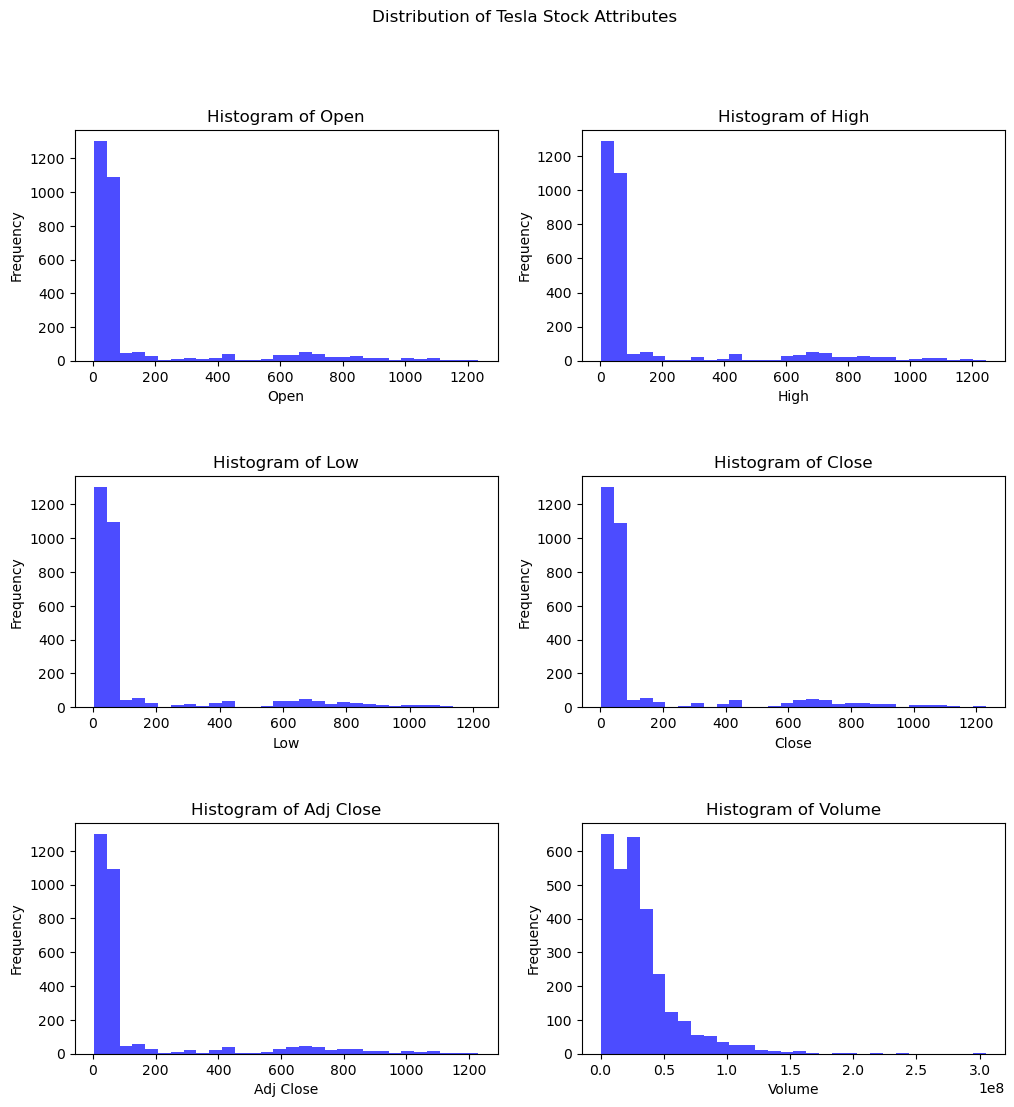

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distribution of Tesla Stock Attributes')

# List of numeric columns
num_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for ax, col in zip(axes.flatten(), num_cols):
    ax.hist(data[col], bins=30, color='blue', alpha=0.7)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.show()

# Plotting closing prices

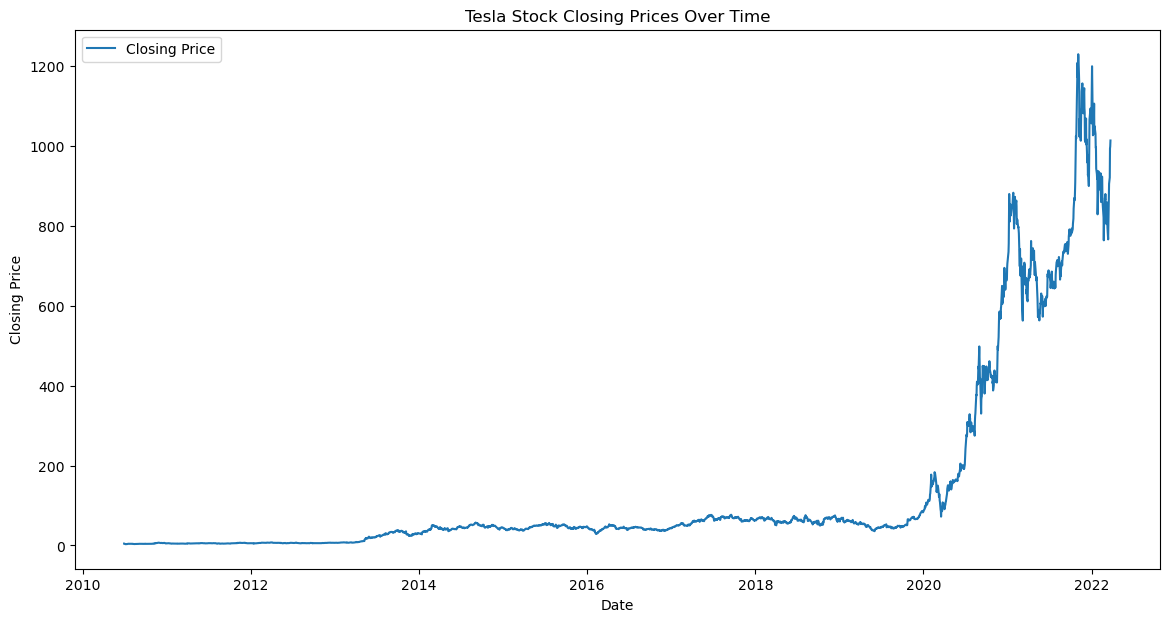

In [31]:

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price')
plt.title('Tesla Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


# Plotting the trading volume

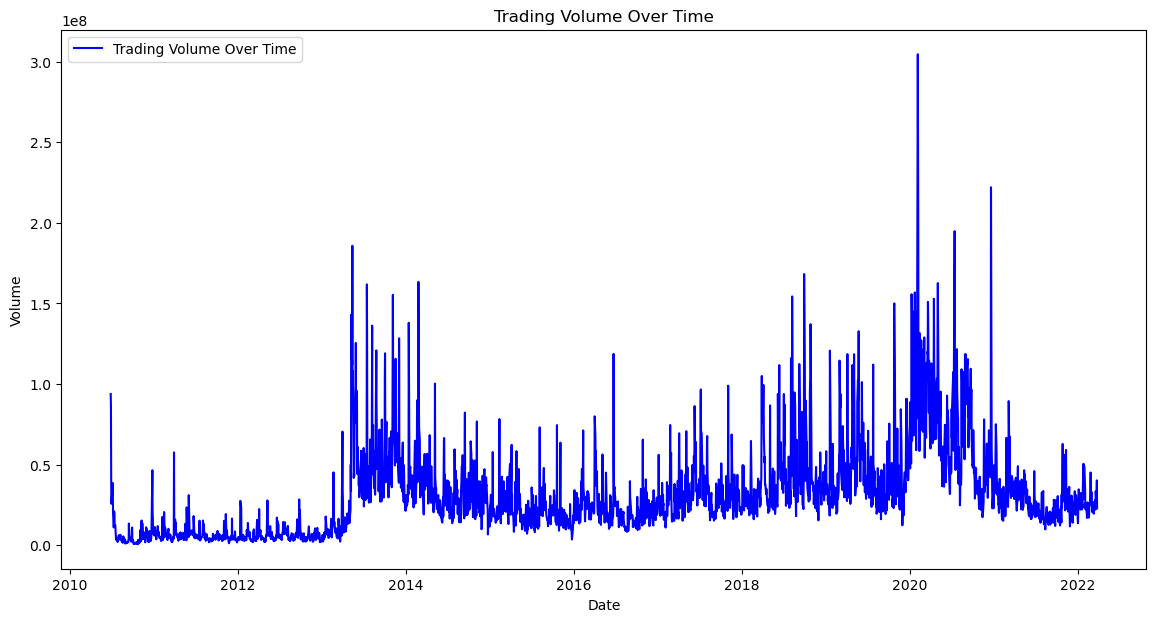

In [32]:

plt.figure(figsize=(14, 7))
plt.plot(data['Volume'], label='Trading Volume Over Time', color='blue')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Box Plots to show volatility and outliers

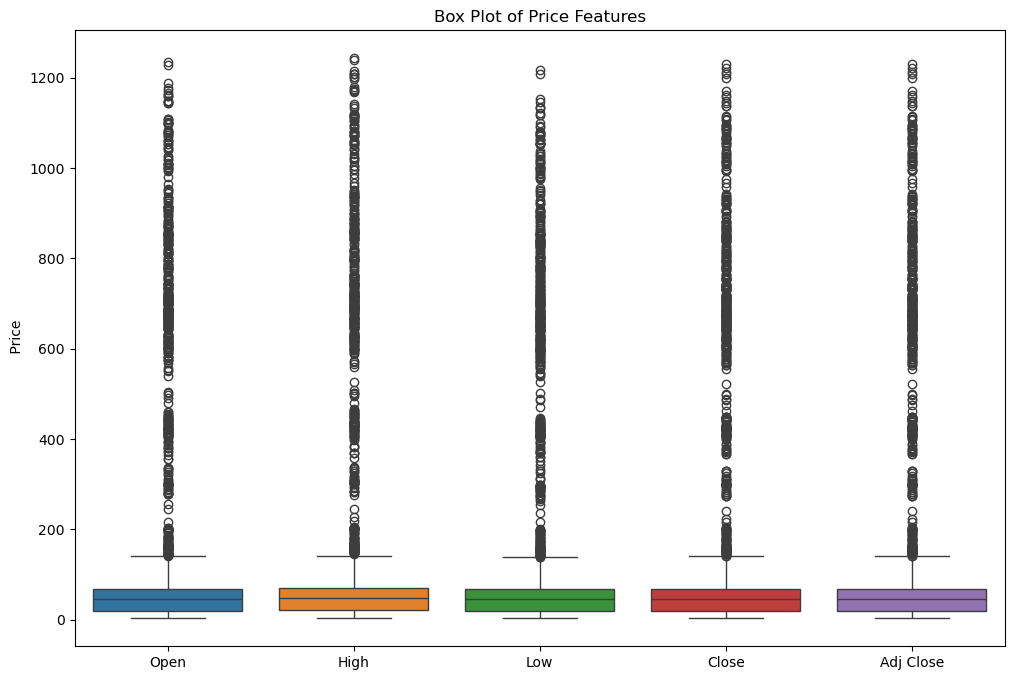

In [33]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['Open', 'High', 'Low', 'Close', 'Adj Close']])
plt.title('Box Plot of Price Features')
plt.ylabel(' Price')
plt.show()


# the box plot show a big number of outliers for alle features 

## Data Standardization
Standardize the continuous features to have a mean of zero and a standard deviation of one.

In [34]:
columns_to_standardize = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
scaler = StandardScaler()
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])
print(data.head())


                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2010-06-29 -0.539560 -0.534640 -0.541240 -0.535764  -0.535764  2.234419
2010-06-30 -0.534128 -0.530403 -0.536513 -0.535812  -0.535812  1.952208
2010-07-01 -0.534760 -0.533921 -0.539000 -0.537307  -0.537307  0.349529
2010-07-02 -0.536360 -0.536126 -0.540280 -0.539514  -0.539514 -0.200703
2010-07-06 -0.538760 -0.538549 -0.542643 -0.541986  -0.541986  0.107938


# Splitting the data into training and testing sets

In [35]:
X = data.drop(['Close'], axis=1)  # all columns except 'Close'
y = data['Close']  # only the 'Close' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Saving the processed data to CSV files

In [36]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


In [ ]:
# Initialize and train the Random Forest Regressor

In [37]:
model = RandomForestRegressor(n_estimators=100, random_state=42)


Traning the model

In [38]:
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Predict on the test set

In [39]:
y_pred = model.predict(X_test)


# Calculate and print evaluation metrics

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error 
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


# Printing evaluation metrics
print(f"The Mean Squared Error (MSE) on the test set is: {mse:.4f}")
print(f"The Root Mean Squared Error (RMSE) on the test set is: {rmse:.4f}")
print(f"R-squared (Coefficient of Determination) on the test set is: {r_squared:.4f}")


The Mean Squared Error (MSE) on the test set is: 0.0000
The Root Mean Squared Error (RMSE) on the test set is: 0.0055
R-squared (Coefficient of Determination) on the test set is: 1.0000


# Visual comparison of Actual vs. Predicted Prices

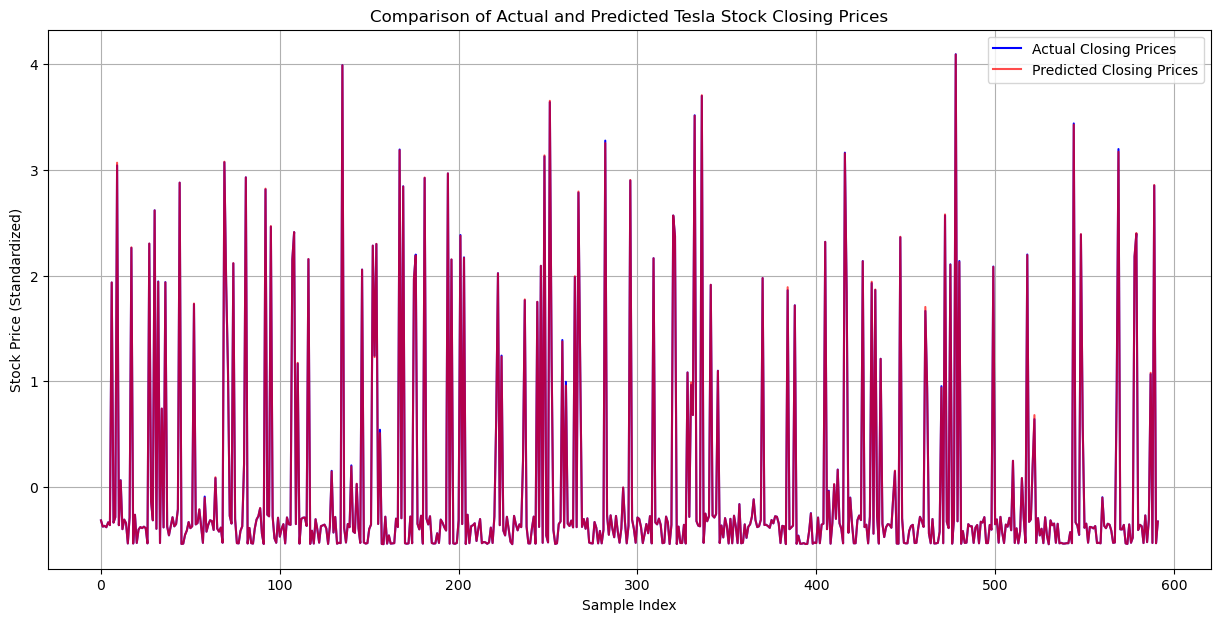

In [41]:
plt.figure(figsize=(15, 7))
plt.plot(y_test.reset_index(drop=True), label='Actual Closing Prices', color='blue')
plt.plot(y_pred, label='Predicted Closing Prices', color='red', alpha=0.7)
plt.title('Comparison of Actual and Predicted Tesla Stock Closing Prices')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price (Standardized)')
plt.legend()
plt.grid(True)
plt.show()
